#Introduction to neural network classification with tensorflow

In this notebook we're going to lear how to write neural networks for classification.

A classification is where you try to classify something as one thing or another

A few types of classification problems
  *Binary classification
  *Muliticlass classification
  *Multilabel  classification

  Creating Data to view and fit

In [ ]:
from sklearn.datasets import make_circles
#Make 1000 examples
nsample = 1000

#Create circles
x, y = make_circles(nsample,noise=0.03,random_state=42)

In [ ]:
#check out features
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
#check the label
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now... let visualize it!

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":x[:,0], "X1":x[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [ ]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

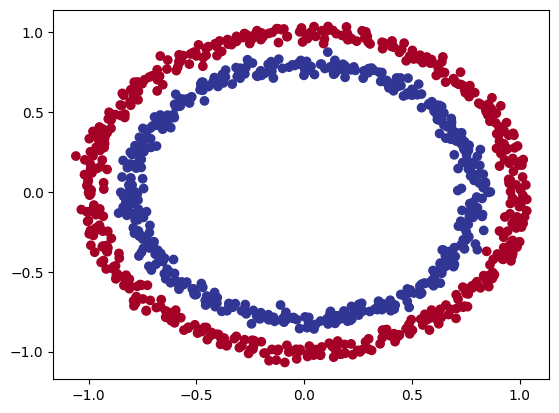

In [ ]:
#visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1], c=y, cmap=plt.cm.RdYlBu);

Exercise: Before pushing forward , spent 10 minutes playing around playground.tensorflow.org networks. see what happens when you change different hyperparameters

Input and Output shapes

In [ ]:
#check the shapes of our features and labels
x.shape, y.shape


((1000, 2), (1000,))

In [ ]:
#How may samples we're working it
x[0], [0]

(array([0.75424625, 0.23148074]), [0])

Steps in modeling

The steps in modelling with tensorflow are typically:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate . . . .

In [ ]:
import tensorflow as tf
#set the random seed
tf.random.set_seed(42)

#1.create a model using the squential api
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


#2. compile the model
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

#3. Fit the model
model1.fit(x, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 4ms/step - loss: 3.8045 - accuracy: 0.4740
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 1.1815 - accuracy: 0.4920
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7216 - accuracy: 0.4950
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7027 - accuracy: 0.4940
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6966 - accuracy: 0.4880


In [ ]:
#lets try and improving our by training for longer
model1.fit(x, y, epochs=200, verbose=0)
model1.evaluate(x,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on binary classsification problem and our model is getting around ~ 50% accuracy ...its performing as if it's guessing

So let's step things up a notch andd an extra layer.

In [ ]:
#set the random seed
tf.random.set_seed(42)

#1.create a model, this timewith 2 layers
model2= tf.keras.Sequential([
    tf.keras.layers.Dense(1),
     tf.keras.layers.Dense(1)
])

#2 compile the model
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

#3 fit model
model2.fit(x,y, epochs=100, verbose=0)
#4. Evaluate the model
model2.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.5000


[0.695103645324707, 0.5]

In [ ]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

#improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might to choose a different optimization function such as Adam instead of SGD
3. fitting a model - perhaps we might fit our model for more epochs(leave it training for longer).

In [ ]:
#set the random seed
tf.random.set_seed(42)

#1. create the model (this time 3 layers)
#add dense neuron
#add another layers with 10 neurons
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

#2. compile model
model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])
#3 fit a model
model3.fit(x,y, epochs=100, verbose=0)

#4 evaluate a model
model3.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.7023 - accuracy: 0.5080


[0.7023009061813354, 0.5080000162124634]

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


from tensorflow.python.ops.array_ops import meshgrid
#to visulize our model's predictions, let's createa function 'plot_decision_boundary()', this function will:

*Take in trained model, features(x) and labels(y)

*Create a meshgrid of the different x values

*Make predictions as well as a line between zones(where each unique class falls)

In [ ]:
import numpy as np

====================================================================

 Plot Decision Boundary Function

In [ ]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
x[0,:]

array([0.75424625, 0.23148074])

In [ ]:
#make 2 dimensions to 1 dimension x[:,0] then get the minimum .min remove the extra 0.1
#make 2 dimensions to 1 dimension x[:,0] then get the maximum .max  remove the extra 0.1
# x and y is the linear progression then you need xmin - ymin and xmin = xmax
xmin, xmax = x[:,0].min() - 0.1, x[:,0].max() + 0.1
ymin, ymax = x[:,1].min() - 0.1, x[:,1].max() + 0.1
xmin,xmax,ymin,ymax

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

In [ ]:
def plot_decision_boundary(model, x, y):
  """
  plots the decision boundary created by a model predicting on x.
  resource  cs231n neural network case study
  This function was inspired by two resources:
   1. https://cs231n.github.io/neural-networks-case-study/
   2. https://madewithml.com/courses/foundations/neural-networks/
  """
  #define the axis boundaries of the plot and create a meshgrid
  xmin, xmax = x[:,0].min() - 0.1, x[:,0].max() + 0.1
  ymin, ymax = x[:,1].min() - 0.1, x[:,1].max() + 0.1
  xx,yy = np.meshgrid(np.linspace(xmin, xmax,100),
                      np.linspace(ymin, ymax, 100))

  #create x value(we going to create prediction on these)
  #stack 2d array together
  xin = np.c_[xx.ravel(), yy.ravel()]

  #make predictions
  ypred = model.predict(xin)

  #check for multi-class
  if len(ypred[0])>1:
    print("doing multiclass classification")
    #We have to reshape our prediction to get them ready for plotting
    ypred = np.argmax(ypred,axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    ypred = np.round(ypred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, ypred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:,0], x[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.xlim(yy.min(), yy.max())



313/313 [==============================] - 1s 2ms/step
doing binary classification


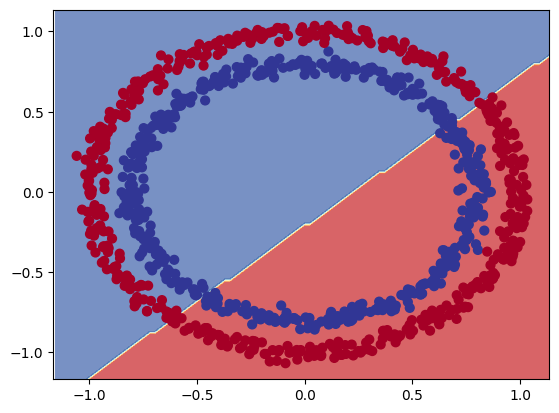

In [ ]:
#Check out the predictions our model is making
plot_decision_boundary(model=model3, x=x, y=y)

In [ ]:
#let's see if our model can be used for a regression problem
#regression means the line
tf.random.set_seed(42)

#Create some regression data
xregression = tf.range(0,1000,5)
yregression = tf.range(100,1100,5) #y=x+100

#split our regresssion data into training and test sets
xregtrain = xregression[:150]
xregtest = xregression[150:]
yregtrain = yregression[:150]
yregtest = yregression[150:]
#fit our model to regresssion data ~error
#model3.fit(tf.expand_dims(xregtrain,axis=-1), yregtrain, epochs=100)

Oh wait... we compiled our model for a binary classification problem
but... were now working on a regression problem. let change the model to suit our data

In [ ]:
# setup random seed
tf.random.set_seed(42)

#1. create the model
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

#2. compile a model, this time  with a regresssion - specific loss function
model3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae"])

#3. Fit the model
model3.fit(tf.expand_dims(xregtrain, axis=-1), yregtrain, epochs=100, verbose =0)
model3.evaluate(xregtrain, yregtrain)

5/5 [==============================] - 0s 3ms/step - loss: 38.5525 - mae: 38.5525


[38.55253982543945, 38.55253982543945]

In [ ]:
yregtrain

<tf.Tensor: shape=(150,), dtype=int32, numpy=
array([100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160,
       165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225,
       230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290,
       295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355,
       360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420,
       425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485,
       490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550,
       555, 560, 565, 570, 575, 580, 585, 590, 595, 600, 605, 610, 615,
       620, 625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680,
       685, 690, 695, 700, 705, 710, 715, 720, 725, 730, 735, 740, 745,
       750, 755, 760, 765, 770, 775, 780, 785, 790, 795, 800, 805, 810,
       815, 820, 825, 830, 835, 840, 845], dtype=int32)>

In [ ]:
# need this (tf.expand_dims(xregtrain, axis=-1)
#it should be one digit per dimenstion
xregtrain

<tf.Tensor: shape=(150,), dtype=int32, numpy=
array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
       130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
       195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
       260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
       325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
       390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
       455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
       520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
       585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
       650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
       715, 720, 725, 730, 735, 740, 745], dtype=int32)>

2/2 [==============================] - 0s 5ms/step


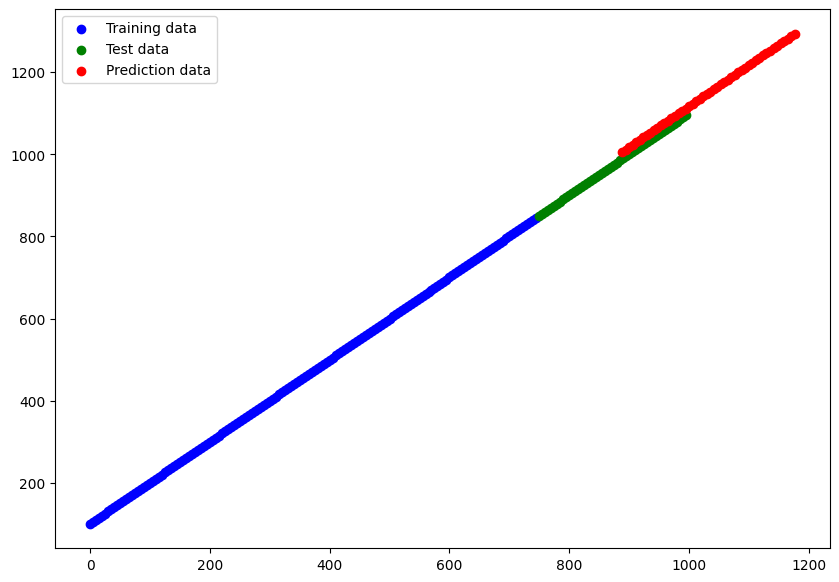

In [ ]:
#make predictions with our trained model
xregpred = model3.predict(xregtest)
yregpred = model3.predict(yregtest)

#plot the model's predictions againts our regression data
plt.figure(figsize=(10,7))
plt.scatter(xregtrain, yregtrain, c="b", label="Training data")
plt.scatter(xregtest, yregtest, c="g", label="Test data")
plt.scatter(xregpred, yregpred, c="r", label="Prediction data")
plt.legend()

##The missing piece Non-linearity

In [ ]:
#set a random seed
tf.random.set_seed(42)

#1. Create the  model
model4 =  tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
])

#2.compile the model
model4.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])
#3. fit model
history = model4.fit(x,y, epochs=100, verbose=0)

#4. evaluate model
model4.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 3.0752 - accuracy: 0.4820


[3.0752336978912354, 0.4819999933242798]

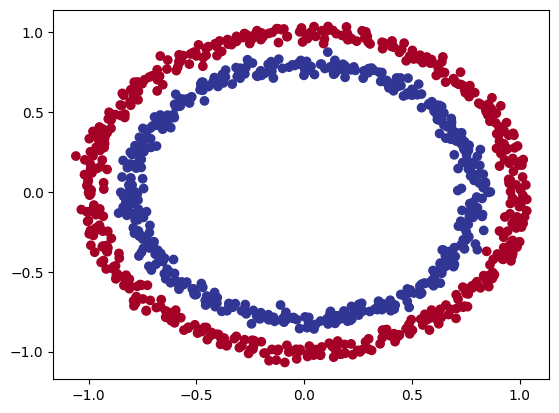

In [ ]:
#check out our data
plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classification


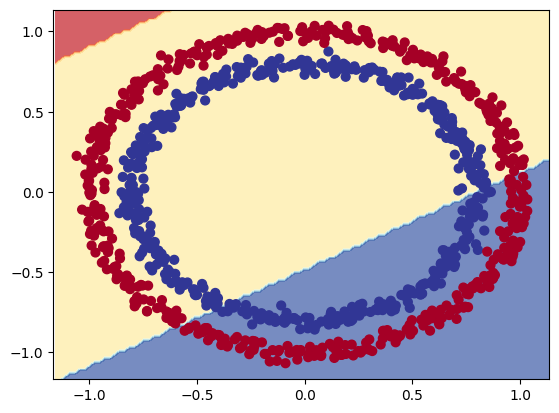

In [ ]:
#check the decision boundary for our latest model
plot_decision_boundary(model=model4, x=x, y=y)

Lets try to build our first neural network with non-linear activation function.
ReLU

In [ ]:
#set random seed
tf.random.set_seed(42)

#1 create a model
model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

#2 compile model
model5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])
#3 fit a model
model5.fit(x, y, epochs=100, verbose=0)

#4 evaluation
model5.evaluate(x,y)

32/32 [==============================] - 0s 2ms/step - loss: 4.1040 - accuracy: 0.4730


[4.103970527648926, 0.4729999899864197]

#time to replicate the multi-layer neural network from tensflow playground

https://playground.tensorflow.org/

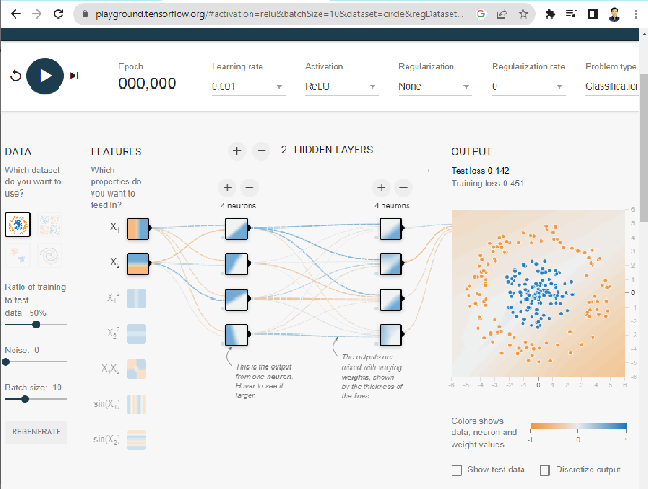

In [ ]:
#Set the random seed
tf.random.set_seed(42)

#1. Create model
model6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"), #input
    tf.keras.layers.Dense(4,activation="relu"), #input
    tf.keras.layers.Dense(1) #output
])

#2. compile model
model6.compile(loss="binary_crossentropy", #=tf.keras.losses.BinaryCrossentropy() ~output diffrently
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])
#3. fit model
history = model6.fit(x, y, epochs=250, verbose=0)
#4. evaluate model
model6.evaluate(x, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 0s 1ms/step
doing binary classification


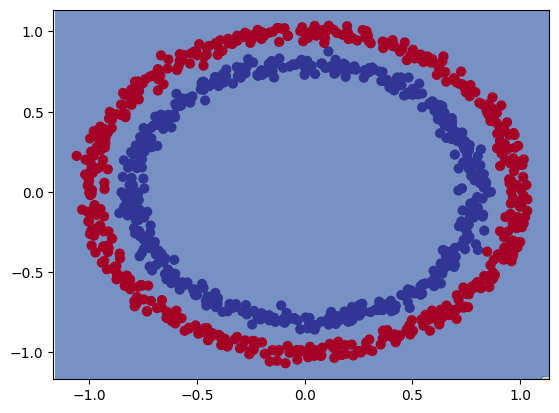

In [ ]:
#how fo our model prediction look
plot_decision_boundary(model=model6,x=x,y=y)

##For Binary Classification use Sigmond!!!

In [ ]:
#Set random seed
tf.random.set_seed(42)

#1 create a model
model7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"), #input
    tf.keras.layers.Dense(4, activation="relu"), #input
    tf.keras.layers.Dense(1, activation="sigmoid") #output
])

#2 compile model
model7.compile(loss="binary_crossentropy", #=tf.keras.losses.BinaryCrossentropy() ~output diffrently
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])
#3 fit model
history = model7.fit(x, y, epochs=100, verbose=0)

#4 evaluate model
model7.evaluate(x, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.2933 - accuracy: 0.9900


[0.29330897331237793, 0.9900000095367432]

313/313 [==============================] - 1s 2ms/step
doing binary classification


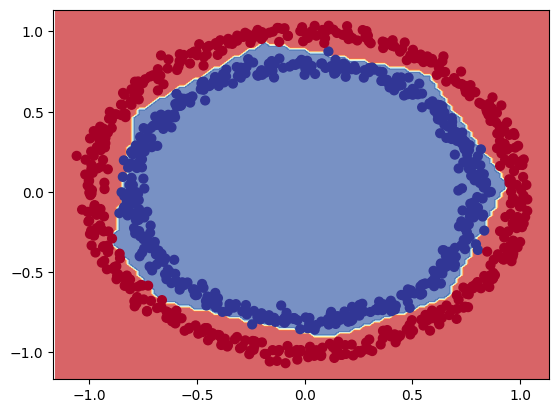

In [ ]:
#let's visualize our incredable metrics
plot_decision_boundary(model=model7,x=x,y=y)

Almost perfect!!!
❓**Question what wrong the predictions we've made? Are we really evaluating our model correctly? Hint: what data did the model learn on and what data did we predict on?

🔑**Note the combination of **linear(straight lines) and non-linear(non-straight lines) functions** is one of the key fundamentals of neural networks.


Now we've discussed the concept of linear and non-linear
functions(of lines), let's see then in action.


In [ ]:
#Create a toy tensor(similar to the data we pass into  our models)
a=tf.cast(tf.range(-10,10), tf.float32)
a

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

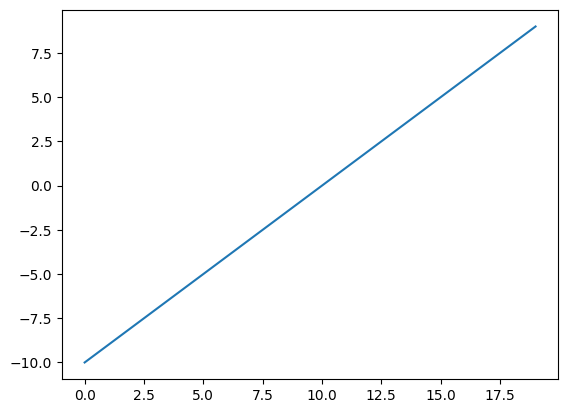

In [ ]:
#Visualize our toy tensor
plt.plot(a)

#sigmoid is nonlinear
#but good in binary classification

#Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))

In [ ]:
def sigmoid(x):
  return 1/(1+tf.exp(-x))

#use the sigmoid function on our toy concept
sigmoid(a)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

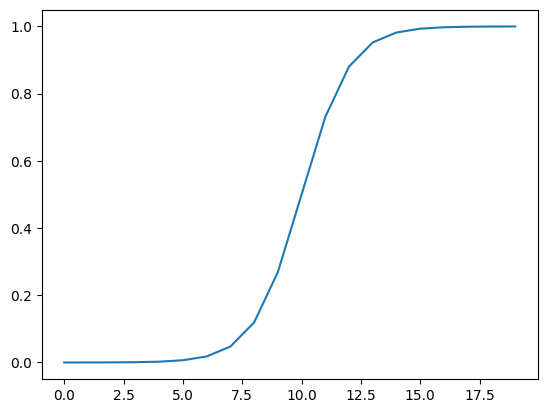

In [ ]:
#plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(a));

##relu - max function of x to 0
#relu is not-linear but bends (30 - 40 degrees)
let's replicate a relu functions

In [ ]:
def relu(x):
  return tf.maximum(0,x)

#pass our toy tensor to our custom relu function
relu(a)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

In [ ]:
a

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

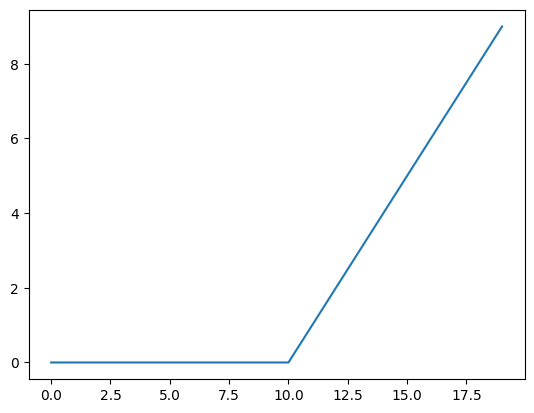

In [ ]:
#plot relu modified tensor
plt.plot(relu(a))

###linear doesnt change anything or unmodified
or a pure line

In [ ]:
#Lets try the linear activation functions
tf.keras.activations.linear(a)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

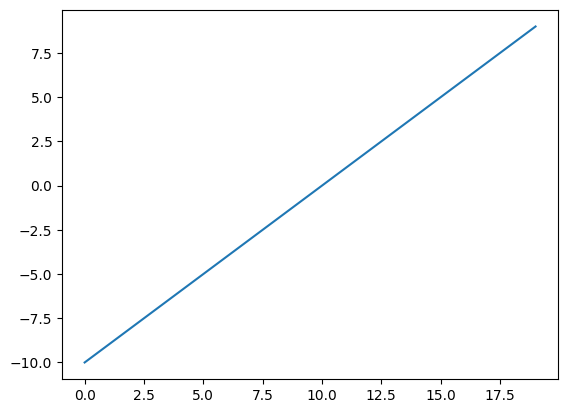

In [ ]:
#does the linear activation function change anything??
plt.plot(tf.keras.activations.linear(a));

Cheat sheet for creating model tf.keras.layers.Dense
https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html

#Evaluating and improving our classificiation

So far we've been training and testing on the same data set...
However, in machine learning this is basically a sin
So let's create a training and test set.

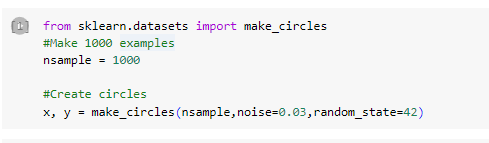


In [ ]:
#check how many example we have
len(x)



1000

In [ ]:
#drawing a line the sample
xtrain, ytrain = x[:800], y[:800]
xtest, ytest = x[800:], y[800:]

xtrain.shape, xtest.shape, ytrain.shape, ytest.shape,

((800, 2), (200, 2), (800,), (200,))

In [ ]:
#lets recreate a model to fit on the training data and evaluate on the testing data
#set random seed
tf.random.set_seed(42)

#1 create model
model8=tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#2 compile model
#learning_rate is the speed of epochs(possibilities) or we can reduce the epochs
model8.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=["accuracy"])

#3  fit model
history=model8.fit(xtrain,ytrain,epochs=25, verbose=0)

#4 evaluate model
#test is the output
model8.evaluate(xtest, ytest)

7/7 [==============================] - 0s 3ms/step - loss: 0.1009 - accuracy: 0.9900


[0.1008804515004158, 0.9900000095367432]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


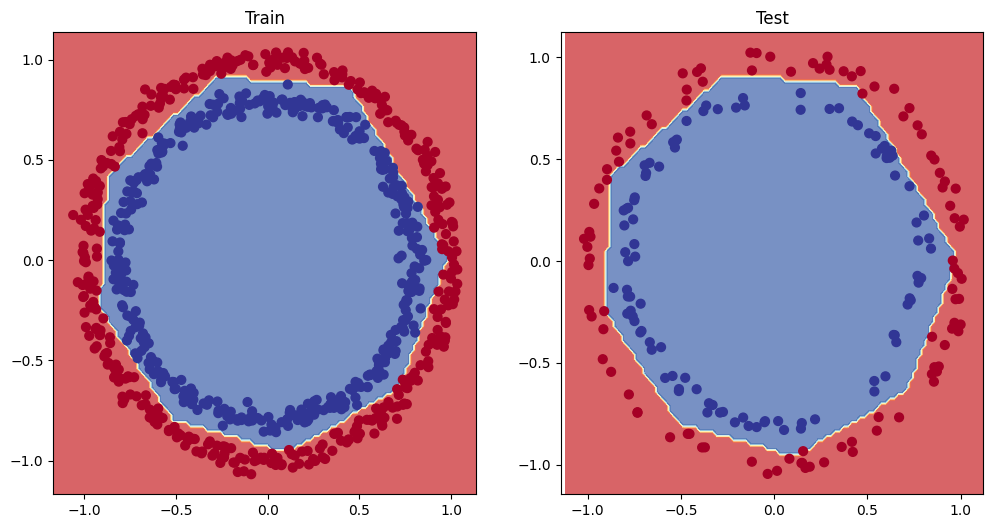

In [ ]:
#plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model8, x=xtrain, y=ytrain)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model8, x=xtest, y=ytest)
plt.show();



In [ ]:
model7.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 4)                 12        
                                                                 
 dense_15 (Dense)            (None, 4)                 20        
                                                                 
 dense_16 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37 (148.00 Byte)
Trainable params: 37 (148.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


###Plot the loss(or training) curves

In [ ]:
#history.history
#Convert the history object into a Dataframe
pd.DataFrame(history.history)

,loss,accuracy
0,0.695036,0.47250
1,0.692601,0.48750
2,0.691059,0.50125
3,0.690653,0.50625
4,0.689160,0.55125
5,0.685670,0.50750
6,0.677657,0.57500
7,0.670867,0.59625
8,0.664364,0.59125
9,0.653128,0.59500


Text(0.5, 1.0, 'Model8 loss curves')

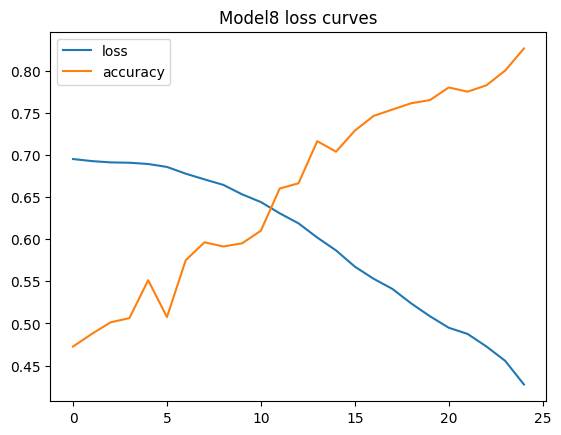

In [ ]:
#Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model8 loss curves")

🔑**Note** For many problems, the loss function going down means the model is improving(the prediction its making are getting ground truth labels)

##Finding the best learning rate

to find the ideal learning rate (the learning rate where the loss decrease the most during training) we're going to use the following steps:

*A learning rate **callback** - you can think of a callback
as an extra piece of functionality, you can add to your *while* its training.
*Another model(we could use the same one as above, but we're practicing building models here)
*A modified loss curves plot

In [ ]:
#For identifying learning rate only!!!!!
#Set random seed
tf.random.set_seed(42)

#1 Create a model (same as model 8)
model9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
    ])

#2 compile a model
model9.compile(loss="binary_crossentropy",
               optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=["accuracy"])

#3 create a learning rate callback
lrscheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 *10**(epoch/20))

#4 fit model pass the lr scheduler callback
history9=model9.fit(xtrain,ytrain,epochs=100, callbacks=[lrscheduler],verbose=0)

#5 evaluate model
model9.evaluate(xtest,ytest)

7/7 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.4950


[0.6934669613838196, 0.4950000047683716]

<Axes: xlabel='epochs'>

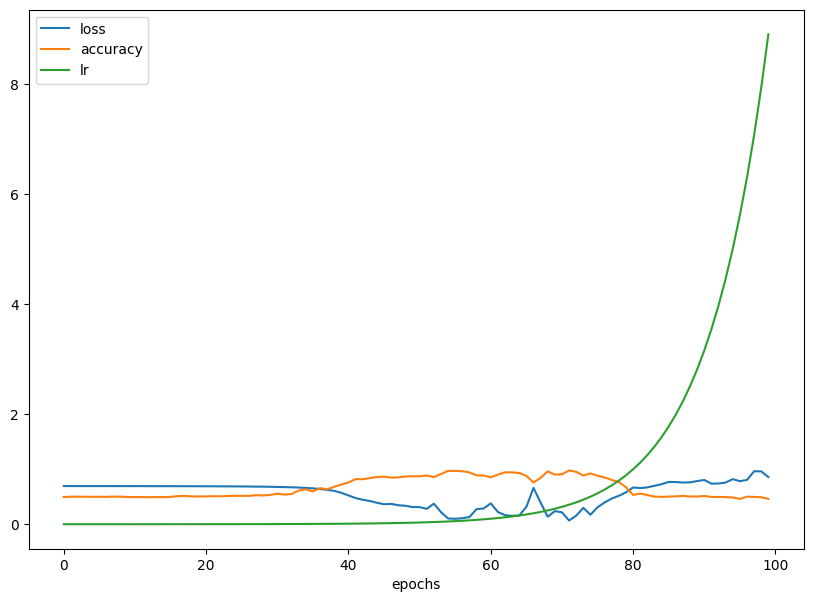

In [ ]:
#check the history
pd.DataFrame(history9.history).plot(figsize=(10,7), xlabel="epochs")

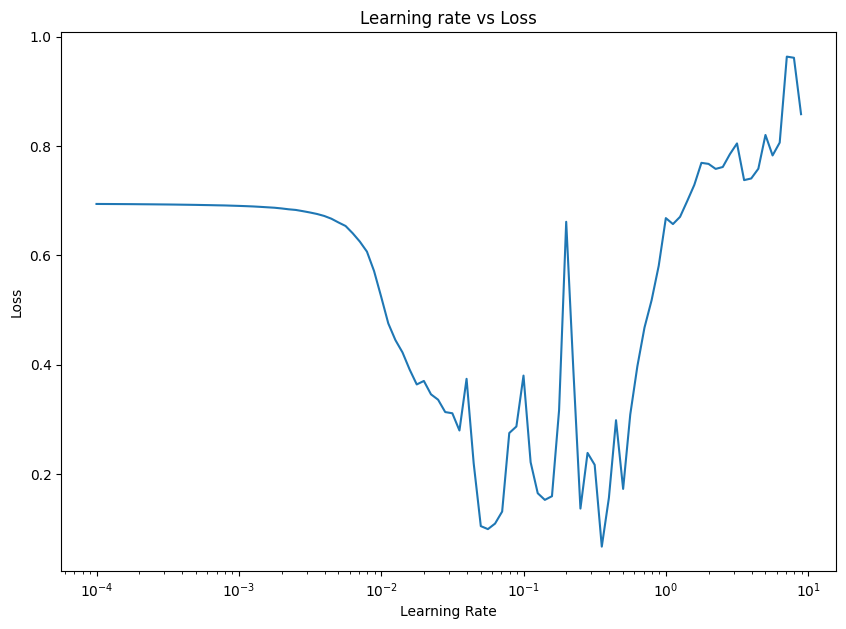

In [ ]:
#plot the learning rate versus the loss
lrs=1e-4*(10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss");

Ideal learning rate curve

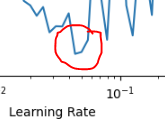

In [ ]:
##Example of other typical learning rate values: ''10**-2 the ** power of''
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

#let's try using a higher *ideal* learning rate with the same model


In [ ]:
#random seed
tf.random.set_seed(42)
#1 Create model
model10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#2 compile model
#model8 learning rate 10**-2
model10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=["accuracy"])

#3 learning rate(optional comparing learning rates)
#lrsched = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

#4 fit model
#history10=model10.fit(xtrain,ytrain, epochs=20, callbacks=[lrsched],verbose=0)
history10=model10.fit(xtrain,ytrain, epochs=20, verbose=0)

#5 evaluate model
# learning_rate=0.02 it learn faster
model10.evaluate(xtest, ytest)

7/7 [==============================] - 0s 2ms/step - loss: 0.0316 - accuracy: 0.9950


[0.0315803699195385, 0.9950000047683716]

In [ ]:
model8.evaluate(xtest, ytest)

7/7 [==============================] - 0s 7ms/step - loss: 0.1009 - accuracy: 0.9900


[0.1008804515004158, 0.9900000095367432]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


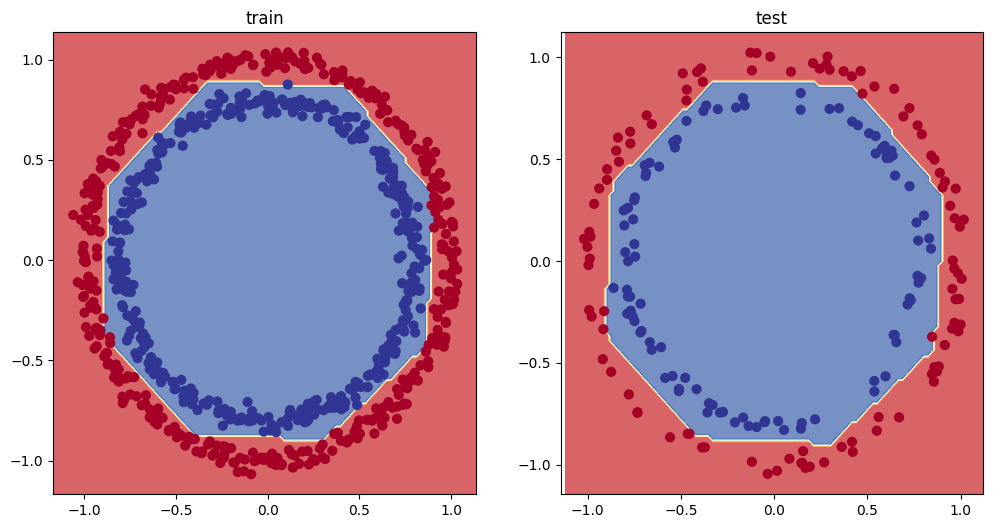

In [ ]:
#plot the decision boundaries for the training and test set
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model=model10, x=xtrain, y=ytrain)

plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model=model10, x=xtest, y=ytest)

plt.show()

####Classified can't be shared for public view!!!!!!!!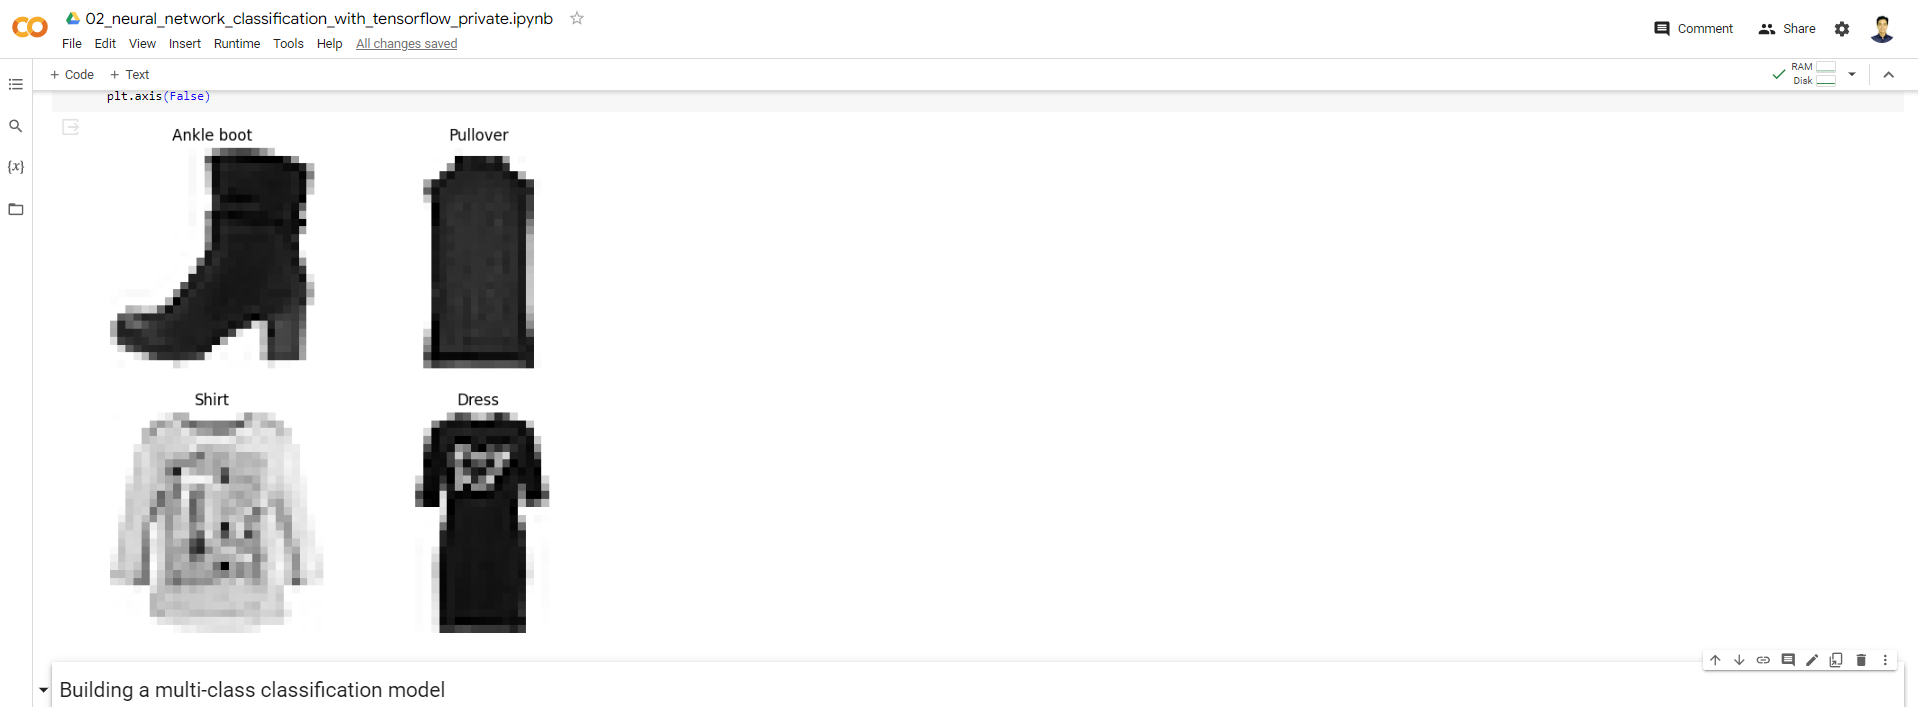
